In [1]:
import xarray as xr 
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import glob
from thesis_toolbox.utils import get_locations_CLP,read_depostion_datasets
from thesis_toolbox.plot.tools import add_letter
from thesis_toolbox.plot.plot_source_contribution import depositon_facet_plot
from DUST.plot.plotting import mpl_base_map_plot_xr
from DUST.plot.maps import map_terrain_china, map_china
from DUST.plot.utils import _gen_flexpart_colormap,_add_colorbar
from matplotlib.colors import LogNorm
from thesis_toolbox.plot.tools import latex_plot
from matplotlib import rc
import matplotlib.cm as cm
import matplotlib
# latex_plot()

In [3]:
if 'snakemake' in globals():
    to_file = True
    path='./'
else:
    path = '../../'
    to_file= False

In [4]:
locs = ['SHAPOTOU','BADOE','YINCHUAN','LUOCHUAN','SACOL','LANTIAN','LINGTAI']
locs_bar = ['SHAPOTOU','YINCHUAN','SACOL','LINGTAI','BADOE','LUOCHUAN','LANTIAN']
total_depo_2micron = read_depostion_datasets(path, locs, 'total_deposition','2micron')
total_depo_2micron = total_depo_2micron.mean(dim='year')
wet_depo_2micron = read_depostion_datasets(path, locs_bar, 'wetdep','2micron')
wet_depo_2micron = wet_depo_2micron.mean(dim='year')
dry_depo_2micron = read_depostion_datasets(path, locs_bar, 'drydep','2micron')
dry_depo_2micron = dry_depo_2micron.mean(dim='year')

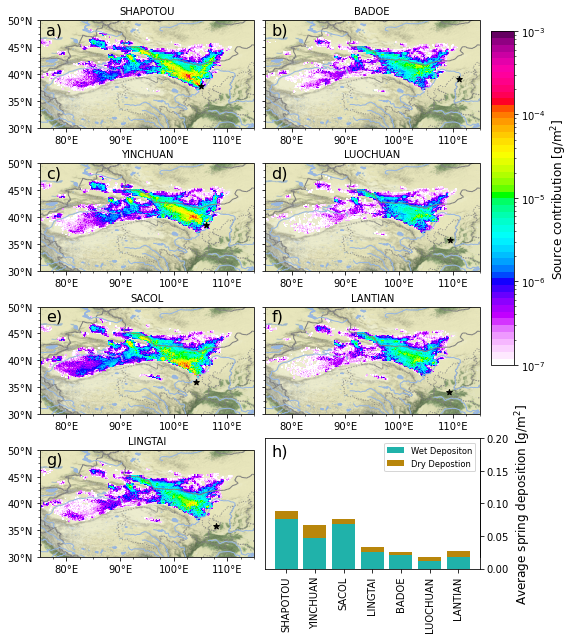

In [3]:
# rc('text', usetex=True)
depositon_facet_plot(total_depo_2micron,wet_depo_2micron,
                     dry_depo_2micron, vmin=1e-7,vmax=1e-3, 
                    ylabel_bar_plot='Average spring deposition [$\mathrm{g/m}^2$]',add_labels=False, ylim=(0,0.2),
                     figsize=(8.3*0.95, 11.7*0.88), hspace=0.1, wspace=0.05,  
                    fontsize_title=10, colorbar=False)
fig = plt.gcf()
# fig.subplots_adjust(wspace=0)
cmap = _gen_flexpart_colormap()
cax = fig.add_axes([0.92, 0.4, 0.04,0.45])
fig.colorbar(cm.ScalarMappable(norm=matplotlib.colors.LogNorm(1e-7,1e-3), cmap=cmap), cax=cax,
            label='Source contribution [$\mathrm{g/m}^2$]')
if to_file:
    plt.savefig(snakemake.output.clay_plot,bbox_inches='tight')


In [4]:
locs = ['SHAPOTOU','BADOE','YINCHUAN','LUOCHUAN','SACOL','LANTIAN','LINGTAI']
locs_bar = ['SHAPOTOU','YINCHUAN','SACOL','LINGTAI','BADOE','LUOCHUAN','LANTIAN']
total_depo_20micron = read_depostion_datasets(path, locs, 'total_deposition','20micron')
total_depo_20micron = total_depo_20micron.mean(dim='year')
wet_depo_20micron = read_depostion_datasets(path, locs_bar, 'wetdep','20micron')
wet_depo_20micron = wet_depo_20micron.mean(dim='year')
dry_depo_20micron = read_depostion_datasets(path, locs_bar, 'drydep','20micron')
dry_depo_20micron = dry_depo_20micron.mean(dim='year')

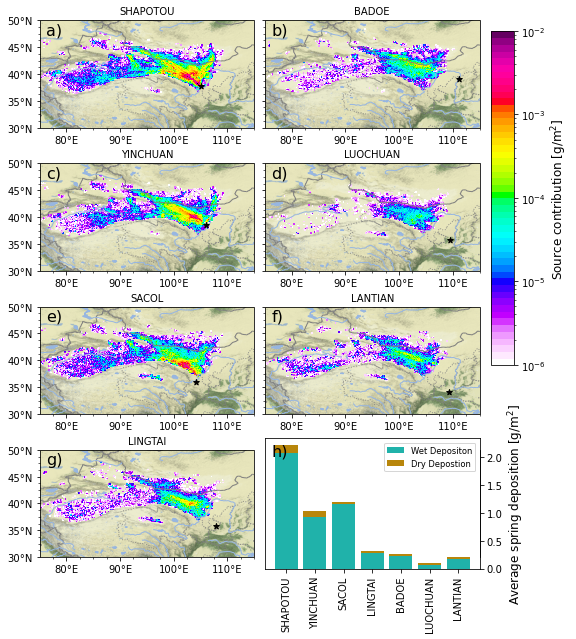

In [5]:
depositon_facet_plot(total_depo_20micron,wet_depo_20micron, dry_depo_20micron,
                     vmin=1e-6,vmax=1e-2,ylabel_bar_plot='Average spring deposition [$\mathrm{g/m}^2$]', 
                     add_labels=False,
                    cbar_label='$\mathrm{g/m}^2$', figsize=(8.3*0.95, 11.7*0.88), hspace=0.1, wspace=0.05,  
                    fontsize_title=10, colorbar=False)

fig = plt.gcf()
# fig.subplots_adjust(wspace=0)
cmap = _gen_flexpart_colormap()
cax = fig.add_axes([0.92, 0.4, 0.04,0.45])
fig.colorbar(cm.ScalarMappable(norm=matplotlib.colors.LogNorm(1e-6,1e-2), cmap=cmap), cax=cax,
            label='Source contribution [$\mathrm{g/m}^2$]')
if to_file:
    plt.savefig(snakemake.output.silt_plot,bbox_inches='tight')